# [2차 프로그래밍 문제]
* 제출날짜: 2024-05-23까지 ipynb 소스자료 업로드하기
* cyber캠퍼스와 깃허브에 올리기
* 실습에서 사용한 weather.csv 파일을 판다스를 이용하여 데이터프레임을 만들어 다음과 같이 처리한다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))
plt.rcParams["font.family"] = 'Malgun Gothic'

## 1) 이 데이터셋의 앞 3개 행과 마지막 3개의 행을 화면에 출력하시오.

In [2]:
weather = pd.read_csv("weather.csv", index_col = 0)

print("앞 3개 행 출력")
print(weather.head(3))
print()
print("마지막 3개 행 출력")
print(weather.tail(3))

앞 3개 행 출력
            평균 기온  최대 풍속  평균 풍속
일시                             
2010-08-01   28.7    8.3    3.4
2010-08-02   25.2    8.7    3.8
2010-08-03   22.1    6.3    2.9

마지막 3개 행 출력
            평균 기온  최대 풍속  평균 풍속
일시                             
2020-07-29   21.6    3.2    1.0
2020-07-30   22.9    9.7    2.4
2020-07-31   25.7    4.8    2.5


## 2) 2015년 6월 6일의 "평균 기온"과 "풍속 정보"를 출력하시오


In [3]:
weather = pd.read_csv("weather.csv", index_col = 0)

print(weather.loc["2015-06-06"])

평균 기온    16.6
최대 풍속     4.4
평균 풍속     1.9
Name: 2015-06-06, dtype: float64


## 3) 가장 무더웠던 날짜을 추출해서 이 날의 기상 데이터을 출력하시오.

In [4]:
weather = pd.read_csv("weather.csv", index_col = 0)

hot_weather = weather.sort_values(by = ["평균 기온"], ascending = False)
print(hot_weather.head(1))

            평균 기온  최대 풍속  평균 풍속
일시                             
2013-08-08   31.3    7.8    4.6


## 4) "평균 기온"이 30도를 넘는 날짜들을 찾아, 이 날의 기상 데이터를 출력하시오.

In [5]:
weather = pd.read_csv("weather.csv", index_col = 0)

result = weather[weather["평균 기온"] > 30.0]
print(result)

            평균 기온  최대 풍속  평균 풍속
일시                             
2013-08-08   31.3    7.8    4.6
2013-08-09   30.6    9.9    6.4
2013-08-10   30.6    7.4    3.8
2018-07-23   30.5    6.5    1.6
2018-08-04   30.3    5.8    3.0


## 5) 연도별 "평균 기온"의 평균에 대한 추이를 선 그래프로 그리시오.

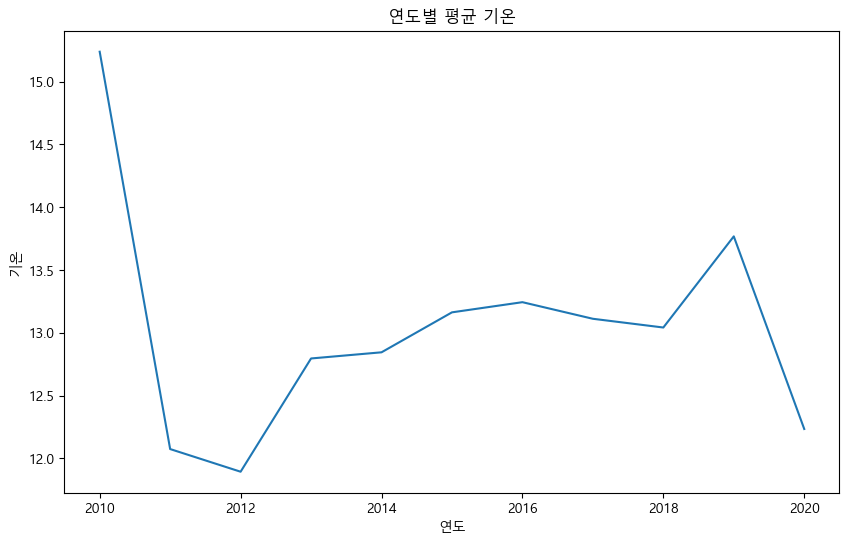

In [6]:
weather = pd.read_csv("weather.csv")

mean_temp = weather['평균 기온'].mean().round(2)
weather['평균 기온'] = weather['평균 기온'].fillna(mean_temp)

weather['year'] = pd.DatetimeIndex(weather['일시']).year

yearly_temp = weather.groupby('year')['평균 기온'].mean()

plt.figure()
plt.plot(yearly_temp)
plt.title("연도별 평균 기온")
plt.xlabel("연도")
plt.ylabel("기온")

plt.show()

## 6) 연도별 "최대 풍속"의 평균을 막대 그래프로 그리시오.

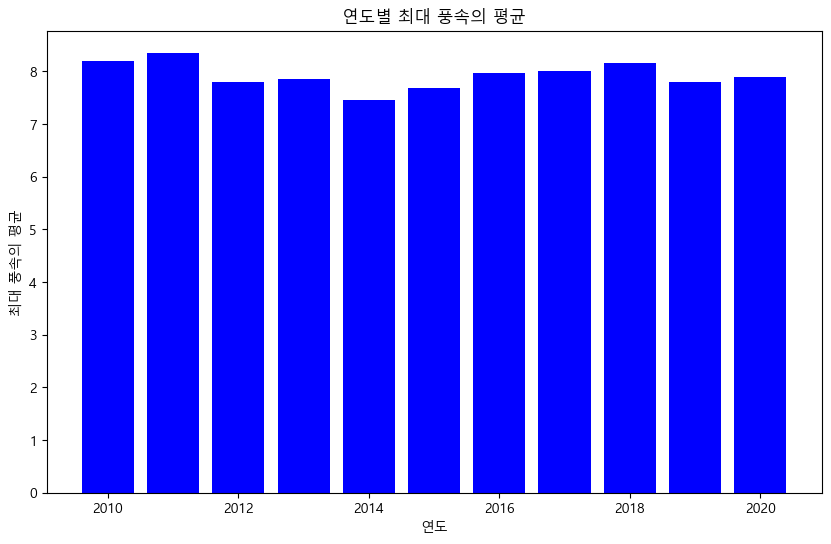

In [7]:
weather = pd.read_csv("weather.csv")

max_wind = weather['최대 풍속'].mean().round(2)
weather['최대 풍속'] = weather['최대 풍속'].fillna(max_wind)

weather['year'] = pd.DatetimeIndex(weather['일시']).year

yearly_wind = weather.groupby('year')['최대 풍속'].mean()

years = np.arange(2010,2021)
plt.bar(years, yearly_wind, color="blue")
plt.xlabel('연도')
plt.ylabel('최대 풍속의 평균')
plt.title("연도별 최대 풍속의 평균")

plt.show()

## 7) 연도별 "평균 풍속"의 합을 히스토그램 그래프로 그리시오

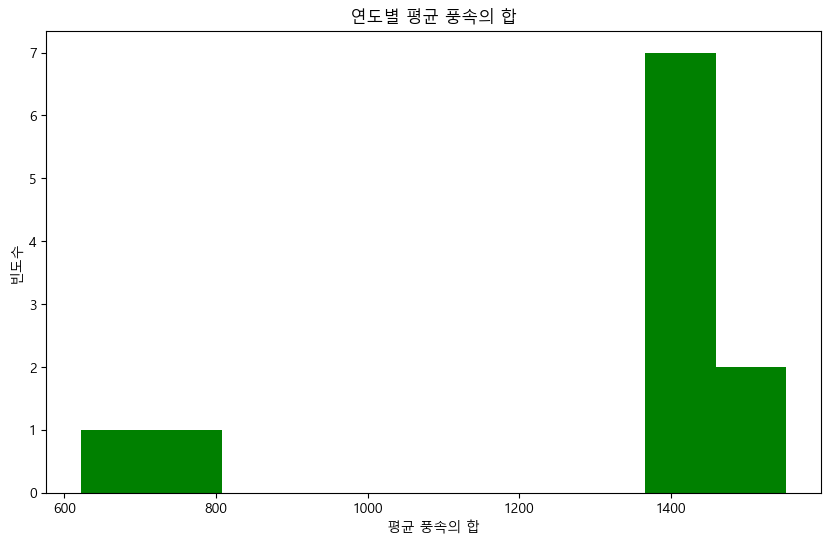

In [10]:
weather = pd.read_csv("weather.csv")

mean_wind = weather['평균 풍속'].mean().round(2)
weather['평균 풍속'] = weather['평균 풍속'].fillna(mean_wind)

weather['year'] = pd.DatetimeIndex(weather['일시']).year

yearly_sum_wind = weather.groupby('year')[['평균 풍속']].sum()

plt.hist(yearly_sum_wind, bins=10, color = "green")
plt.title("연도별 평균 풍속의 합")
plt.xlabel("평균 풍속의 합")
plt.ylabel("빈도수")

plt.show()

## 8) 2015년과 2016년의 "평균 기온"의 평균을 비교하여 어느 해가 더 더웠는지 출력하시오.

In [11]:
weather = pd.read_csv("weather.csv")

mean_temp = weather['평균 기온'].mean().round(2)
weather['평균 기온'] = weather['평균 기온'].fillna(mean_temp)

weather['year'] = pd.DatetimeIndex(weather['일시']).year

yearly_avg_temp = weather.groupby('year')['평균 기온'].mean()

print("2015년과 2016년 중 더 더웠던 해는:")
if yearly_avg_temp.loc[2015] > yearly_avg_temp.loc[2016]:
    print("2015년")
else:
    print("2016년")

2015년과 2016년 중 더 더웠던 해는:
2016년


## 9) 월별 "평균 기온" 의 합이 가장 적은 달과 가장 많은 달을 출력하시오.

In [12]:
weather = pd.read_csv("weather.csv")

mean_temp = weather['평균 기온'].mean().round(2)
weather['평균 기온'] = weather['평균 기온'].fillna(mean_temp)

weather['month'] = pd.DatetimeIndex(weather['일시']).month

yearly_sum_temp = weather.groupby('month')['평균 기온'].sum()
yearly_sum_temp.sort_values(inplace = True)

print("[평균 기온의 합이 가장 낮은 달]")
print(yearly_sum_temp.head(1))
print()
print()
print("[평균 기온의 합이 가장 높은 달]")
print(yearly_sum_temp.tail(1))

[평균 기온의 합이 가장 낮은 달]
month
1    495.5
Name: 평균 기온, dtype: float64


[평균 기온의 합이 가장 높은 달]
month
8    7672.1
Name: 평균 기온, dtype: float64


## 10) 연도별 "최대 풍속"의 평균이 가장 큰 연도을 출력하시오.

In [13]:
weather = pd.read_csv("weather.csv")

max_wind = weather['최대 풍속'].mean().round(2)
weather['최대 풍속'] = weather['최대 풍속'].fillna(max_wind)

weather['year'] = pd.DatetimeIndex(weather['일시']).year

yearly_avg_wind = weather.groupby('year')['최대 풍속'].mean()

yearly_avg_wind.sort_values(ascending = False, inplace = True)

print("[최대 풍속의 평균이 가장 큰 연도]")
print(yearly_avg_wind.head(1))

[최대 풍속의 평균이 가장 큰 연도]
year
2011    8.355616
Name: 최대 풍속, dtype: float64
